# <font color='#2B17B0'>CIENCIA DE DATOS APLICADA A FINANZAS</font>
Sesión 8, 2023-10-30/31<br>
Carlos Crespo Elizondo, MSF<br>
EGADE BUSINESS SCHOOL

## <font color='#2B17B0'>Ligas API Binance</font>

* _Repositorio Ofical API Binance:_<br>
        https://github.com/binance<br>
* _Documentación Conector Binance:_<br>
        https://github.com/binance/binance-connector-python<br>
* _Specs del API:_ <br>
        https://binance-docs.github.io/apidocs/spot/en/#introduction<br>

## <font color='#2B17B0'>Importar librerías</font>

In [4]:
from binance.spot import Spot 
import pandas as pd


## <font color='#2B17B0'>Establecer cliente con Binance</font>

Para comenzar, es esencial establecer las claves de autenticación que generamos en la sección de API's en Binance.com.

In [5]:
api_key = # TU LLAVE PUBLICA
api_password = # TU LLAVE SECRETA

Con las claves listas, procedemos a establecer la comunicación con Binance mediante la creación de un cliente, utilizando la clase Spot proporcionada por el API de Binance.

In [6]:
cliente = Spot(api_key, api_password)

Tal como exploramos en la sesión, la clase Spot incorpora numerosas funciones útiles. Por ejemplo, podemos obtener un resumen instantáneo de nuestra cuenta empleando el método account_snapshot.

## <font color='#2B17B0'>Detalles de la cuenta Spot</font>

In [ ]:
cliente.account_snapshot("SPOT")

Para consultar las últimas "n" operaciones de una criptomoneda específica, aplicamos el método `historical_trades`. Este nos presenta por defecto las últimas 500 transacciones, aunque podemos solicitar hasta un máximo de 1,000 ajustando el parámetro `limit`.

> _**CORRECCIÓN DEL LUNES:** En la clase, mencioné incorrectamente que el primer elemento de la lista representa la transacción más reciente. Me equivoqué; si observamos con detenimiento, el 'id' de cada transacción se incrementa en la lista, lo que significa que el elemento con índice 0 es en realidad la operación más antigua, mientras que el último elemento, -1, es la más reciente._

## <font color='#2B17B0'>Ver trades históricos</font>

In [7]:
precios_btc = cliente.historical_trades('BTCUSDT',limit=10)
precios_btc

[{'id': 3265543098,
  'price': '35512.13000000',
  'qty': '0.00296000',
  'quoteQty': '105.11590480',
  'time': 1698900155558,
  'isBuyerMaker': True,
  'isBestMatch': True},
 {'id': 3265543099,
  'price': '35512.13000000',
  'qty': '0.00641000',
  'quoteQty': '227.63275330',
  'time': 1698900155656,
  'isBuyerMaker': True,
  'isBestMatch': True},
 {'id': 3265543100,
  'price': '35512.13000000',
  'qty': '0.27088000',
  'quoteQty': '9619.52577440',
  'time': 1698900155725,
  'isBuyerMaker': True,
  'isBestMatch': True},
 {'id': 3265543101,
  'price': '35512.13000000',
  'qty': '0.00033000',
  'quoteQty': '11.71900290',
  'time': 1698900155725,
  'isBuyerMaker': True,
  'isBestMatch': True},
 {'id': 3265543102,
  'price': '35512.13000000',
  'qty': '0.22728000',
  'quoteQty': '8071.19690640',
  'time': 1698900155725,
  'isBuyerMaker': True,
  'isBestMatch': True},
 {'id': 3265543103,
  'price': '35512.13000000',
  'qty': '0.00049000',
  'quoteQty': '17.40094370',
  'time': 1698900155725

Una forma sencilla de visualizar solo los precios es a través de un `for loop`

In [8]:
lista_precios = []
for precio in precios_btc:
    lista_precios.append(precio['price'])

1. Creo una lista llamada `lista_precios` y la defino vacía
1. Creo el `for loop` guardando el valor de la iteración en turno, en la variable `precios`
1. `precios` es un diccionario, y utilizando la llave `price`, obtengo el precio de la transacción en turno y lo guardamos en la lista `lista_precios` utilizando el método `append`

In [9]:
lista_precios

['35512.13000000',
 '35512.13000000',
 '35512.13000000',
 '35512.13000000',
 '35512.13000000',
 '35512.13000000',
 '35512.13000000',
 '35511.74000000',
 '35511.73000000',
 '35511.73000000']

> _**NOTA:**  la situación anterior hubiera sido ideal para aplicar el método de 'list comprehension', el cual no discutimos en clase. A continuación, lo desarrollaré:_

In [10]:
lista_precios2 = [precio['price'] for precio in precios_btc]
lista_precios2

['35512.13000000',
 '35512.13000000',
 '35512.13000000',
 '35512.13000000',
 '35512.13000000',
 '35512.13000000',
 '35512.13000000',
 '35511.74000000',
 '35511.73000000',
 '35511.73000000']

'list comprehension' extrae el `precio` de cada elemento dentro de la lista `precios_btc` y lo añade directamente a `lista_precios`.

## <font color='#2B17B0'>Ver precios O-H-L-C</font>

La función `klines` nos permite acceder a los precios históricos de apertura, máximo, mínimo, cierre y volumen, entre otros. Es crucial especificar el par de interés y el intervalo de tiempo deseado en los parámetros de la función (por ejemplo, 1s, 1m, 5m, 1h, 1d, etc.).

In [13]:
klines = cliente.klines('BTCUSDT', '1h')
df = pd.DataFrame(klines)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1697104800000,26742.30000000,26782.93000000,26732.73000000,26754.79000000,848.54755000,1697108399999,22701781.20705750,41251,417.50990000,11169471.26165470,0
1,1697108400000,26754.80000000,26867.14000000,26721.79000000,26837.84000000,1118.35858000,1697111999999,29951353.88296260,44361,498.47122000,13353799.62690120,0
2,1697112000000,26837.84000000,26857.25000000,26753.20000000,26829.99000000,1234.09508000,1697115599999,33089201.72283190,61837,513.03235000,13755056.90850320,0
3,1697115600000,26830.00000000,26862.74000000,26685.71000000,26761.60000000,1250.80678000,1697119199999,33484040.57321870,63884,558.73533000,14957867.72615530,0
4,1697119200000,26761.60000000,26778.89000000,26633.57000000,26701.94000000,1079.08891000,1697122799999,28811399.12263860,62918,521.71275000,13929144.64028130,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1698886800000,35423.30000000,35616.01000000,35397.21000000,35567.88000000,1474.15678000,1698890399999,52349329.31438740,49519,736.97967000,26171031.25187030,0
496,1698890400000,35567.88000000,35984.99000000,35518.61000000,35678.85000000,3510.79479000,1698893999999,125464412.59803680,97773,1832.46481000,65494157.53471920,0
497,1698894000000,35678.85000000,35819.81000000,35550.00000000,35571.68000000,2247.13667000,1698897599999,80156371.48798040,65512,1044.43685000,37259459.27456920,0
498,1698897600000,35571.68000000,35600.00000000,35445.92000000,35460.39000000,1226.10027000,1698901199999,43561720.44976880,43364,557.25875000,19799046.63346980,0


> _**COMENTARIO CLASE LUNES:**  Parece que omitimos esta función en clase. Al revisar el DataFrame df, notamos que las columnas solo están numeradas del 0 al 11, sin nombres descriptivos. Para entender el significado de cada columna, es recomendable consultar la documentación de Binance en este enlace: https://binance-docs.github.io/apidocs/spot/en/#kline-candlestick-data. He resaltado en rojo la descripción correspondiente a cada columna._<br><br>

![documentación](https://dl.dropboxusercontent.com/scl/fi/7a9zmrd73tqfmw2jjmlvf/Screenshot-2023-11-01-at-22.59.02.png?rlkey=mpqq7x27sedi01m6l5sw1ygvi&dl=0)

> _**COMENTARIO CLASE MARTES:**  Con más detalle, incorporaré la columna volume en nuestro código y eliminaré las columnas que no necesitaremos más adelante._<br><br>
> _**COMENTARIO GENERAL:**  Optamos por mantener los nombres de las columnas en inglés, ya que así facilitaremos la creación de gráficas financieras._

In [14]:
columnas_velas = {
    0: 'Date',
    1: 'Open',
    2: 'High',
    3: 'Low',
    4: 'Close',
    5: 'Volume'    
}

df.rename(columns=columnas_velas, inplace=True)
df.drop(columns=df.columns[6:], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    500 non-null    int64 
 1   Open    500 non-null    object
 2   High    500 non-null    object
 3   Low     500 non-null    object
 4   Close   500 non-null    object
 5   Volume  500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


Los tipos de datos de las columnas `Open`, `High`, `Low`,  `Close` y `Date` requieren ajustes; transformaremos sus valores de 'object' a numéricos, y la columna `Date` a formato 'datetime'.

In [29]:
lista = ['Open', 'High', 'Low', 'Close', 'Volume']
df[lista] = df[lista].apply(pd.to_numeric)

In [17]:
lista_columnas_fechas = ['Date']
df[lista_columnas_fechas] = df[lista_columnas_fechas].apply(pd.to_datetime, unit='ms')

In [18]:
df.set_index('Date', inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-10-12 10:00:00 to 2023-11-02 05:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    500 non-null    float64
 1   High    500 non-null    float64
 2   Low     500 non-null    float64
 3   Close   500 non-null    float64
 4   Volume  500 non-null    float64
dtypes: float64(5)
memory usage: 23.4 KB


In [20]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-10-12 10:00:00,26742.30,26782.93,26732.73,26754.79,848.54755
2023-10-12 11:00:00,26754.80,26867.14,26721.79,26837.84,1118.35858
2023-10-12 12:00:00,26837.84,26857.25,26753.20,26829.99,1234.09508
2023-10-12 13:00:00,26830.00,26862.74,26685.71,26761.60,1250.80678
2023-10-12 14:00:00,26761.60,26778.89,26633.57,26701.94,1079.08891
...,...,...,...,...,...
2023-11-02 01:00:00,35423.30,35616.01,35397.21,35567.88,1474.15678
2023-11-02 02:00:00,35567.88,35984.99,35518.61,35678.85,3510.79479
2023-11-02 03:00:00,35678.85,35819.81,35550.00,35571.68,2247.13667


## <font color='#2B17B0'>Crear gráfica de Velas Japonesas</font>

> _**NOTA CLASE LUNES:** Durante la clase no utilizamos la librería `mplfinance`.  Es una librería que nos ayuda a hacer gráficas financieras de manera fácil.  Puedes ver su documentación en la página https://github.com/matplotlib/mplfinance.  Para instalar la librería: `pip install mplfinance`_

In [21]:
import mplfinance as mpf

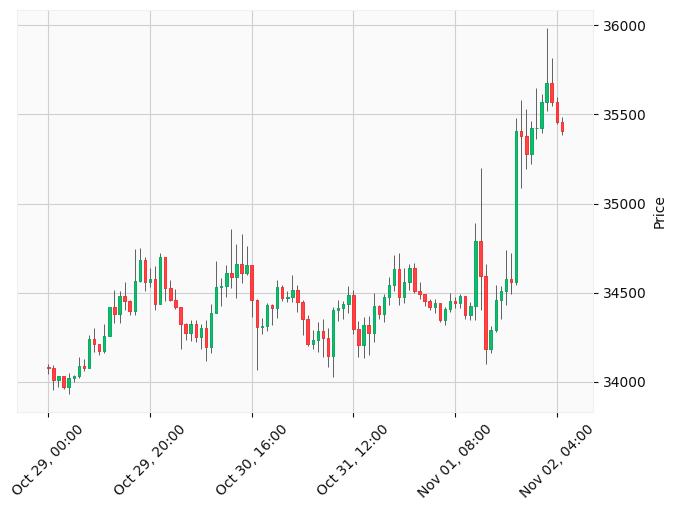

In [27]:
mpf.plot(df.loc['2023-10-29':], type='candle', style='yahoo') #<---Código de la clase del martes.
#No incluimos el parámetro volume como True

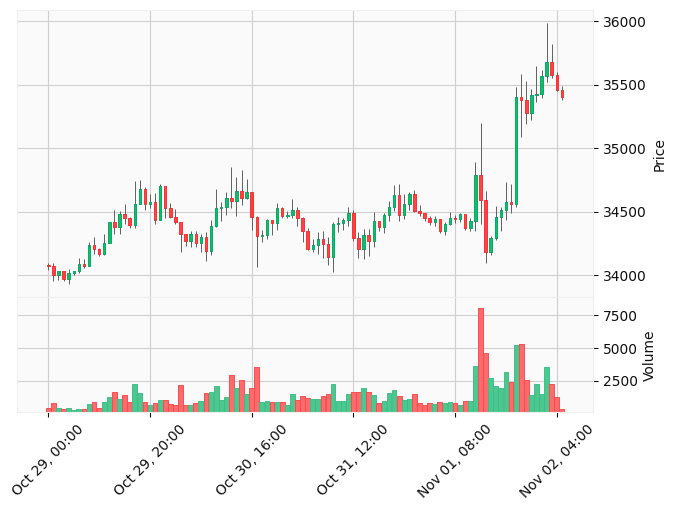

In [28]:
#Código incluyendo el parámetro volume como True
mpf.plot(df.loc['2023-10-29':], type='candle', style='yahoo', volume=True) 

## <font color='#2B17B0'>Generar ordenes</font>

La función `new_order` nos permite realizar operaciones de compra o venta en el mercado. Debemos de especificar los detalles de la orden que deseamos ejecutar, como el par de criptomonedas, el tipo de orden, el precio y la cantidad.

### <font color='#2B17B0'>Orden de compra</font>

In [ ]:
params = {
    "symbol": "BUSDUSDT",
    "side": "BUY",
    "type": "MARKET",
    "quantity": 8,
}

trade = cliente.new_order(**params)

In [ ]:
trade

### <font color='#2B17B0'>Orden de venta</font>

In [ ]:
params = {
    "symbol": "BUSDUSDT",
    "side": "SELL",
    "type": "MARKET",
    "quantity": 18,
}

trade = cliente.new_order(**params)

In [ ]:
trade